# YOLOv8s Model Training on Fridge Products Dataset

This notebook demonstrates the process of training YOLOv8s on a custom dataset of images of produce in a fridge. The provided code shows the steps to prepare the dataset, train the model, analyze the results, and deploying the trained model on Roboflow.

# Setup

We begin by installing the required packages. The most important being `ultralytics`, which provides the implementation of YOLO models. We also check the package version to ensure it is compatible. We also check we have access to a GPU to speed up the training process.

In [ ]:
!pip install --quiet ultralytics==8.0.20
!pip install roboflow

import os
from IPython.display import display, Image
import glob
from sklearn.metrics import confusion_matrix
from roboflow import Roboflow
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 25.8/78.2 GB disk)


In [ ]:
!nvidia-smi

Mon Jul  3 18:46:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    43W / 400W |      3MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Dataset Preparation

We begin by specifying the path to the desired folder where the dataset will be stored. We create the folder if it doesn't exist and navigate to the datasets folder:

In [ ]:
HOME = os.getcwd()
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


To prepare the dataset, we use the Roboflow library to download and organize the dataset from the Roboflow platform. We provide our Roboflow API key and specify the project and version containing our desired dataset:

In this case we had built our dataset directly in Roboflow, by joining a large pool of images from different datasets, as well as annotating that data further and inserting and annotating our own data.

In [ ]:
rf = Roboflow(api_key="CtvhTfTRuoNXXts6BwZQ")
project = rf.workspace("computer-vision-group-ji0bm").project("group_work")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to group_work-1 in yolov8:: 100%|██████████| 29014/29014 [00:05<00:00, 5155.45it/s]


## Custom Training

The provided code is a command-line instruction for training a YOLOv8 object detection model using the Ultralytics YOLOv8 library. Let's break down each parameter and discuss their purpose and the reasoning behind their values:

- `!yolo`: This indicates the command to execute the YOLOv8 library.
- `task=detect`: Specifies the task as object detection, which involves detecting and localizing objects within an image.
- `mode=train`: Sets the mode to train, indicating that we want to train the model.
- `model=yolov8s.pt`: Specifies the initial model to use for training. In this case, it is the `yolov8s.pt` model, which refers to the YOLOv8 small architecture.
- `data={dataset.location}/data.yaml`: Points to the YAML file containing the dataset configuration. It specifies the paths to the training and validation data, number of classes, and other dataset-related information.
- `epochs=50`: Determines the number of training epochs. An epoch refers to a complete pass through the entire dataset during training. Here, the model will be trained for 50 epochs.
- `imgsz=800`: Sets the input image size for training. In this case, the images will be resized to 800x800 pixels. A larger image size can capture more details but requires more computational resources.
- `plots=True`: Enables the generation of plots during training. This allows visualizing the training progress, such as loss curves and mAP (mean Average Precision) values.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/group_work-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fals

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


Please note the model was trained on more than 10 epochs, actually 40 however outputs were lost and had to be recreated for further intepretation


#### Confusion Matrix

The confusion matrix is a useful tool to evaluate the model's performance in terms of classification accuracy. It shows the number of true positives, true negatives, false positives, and false negatives for each class. To visualize the confusion matrix, we can display the corresponding image:

In [ ]:
import os
os.getcwd()

'/content'

/content


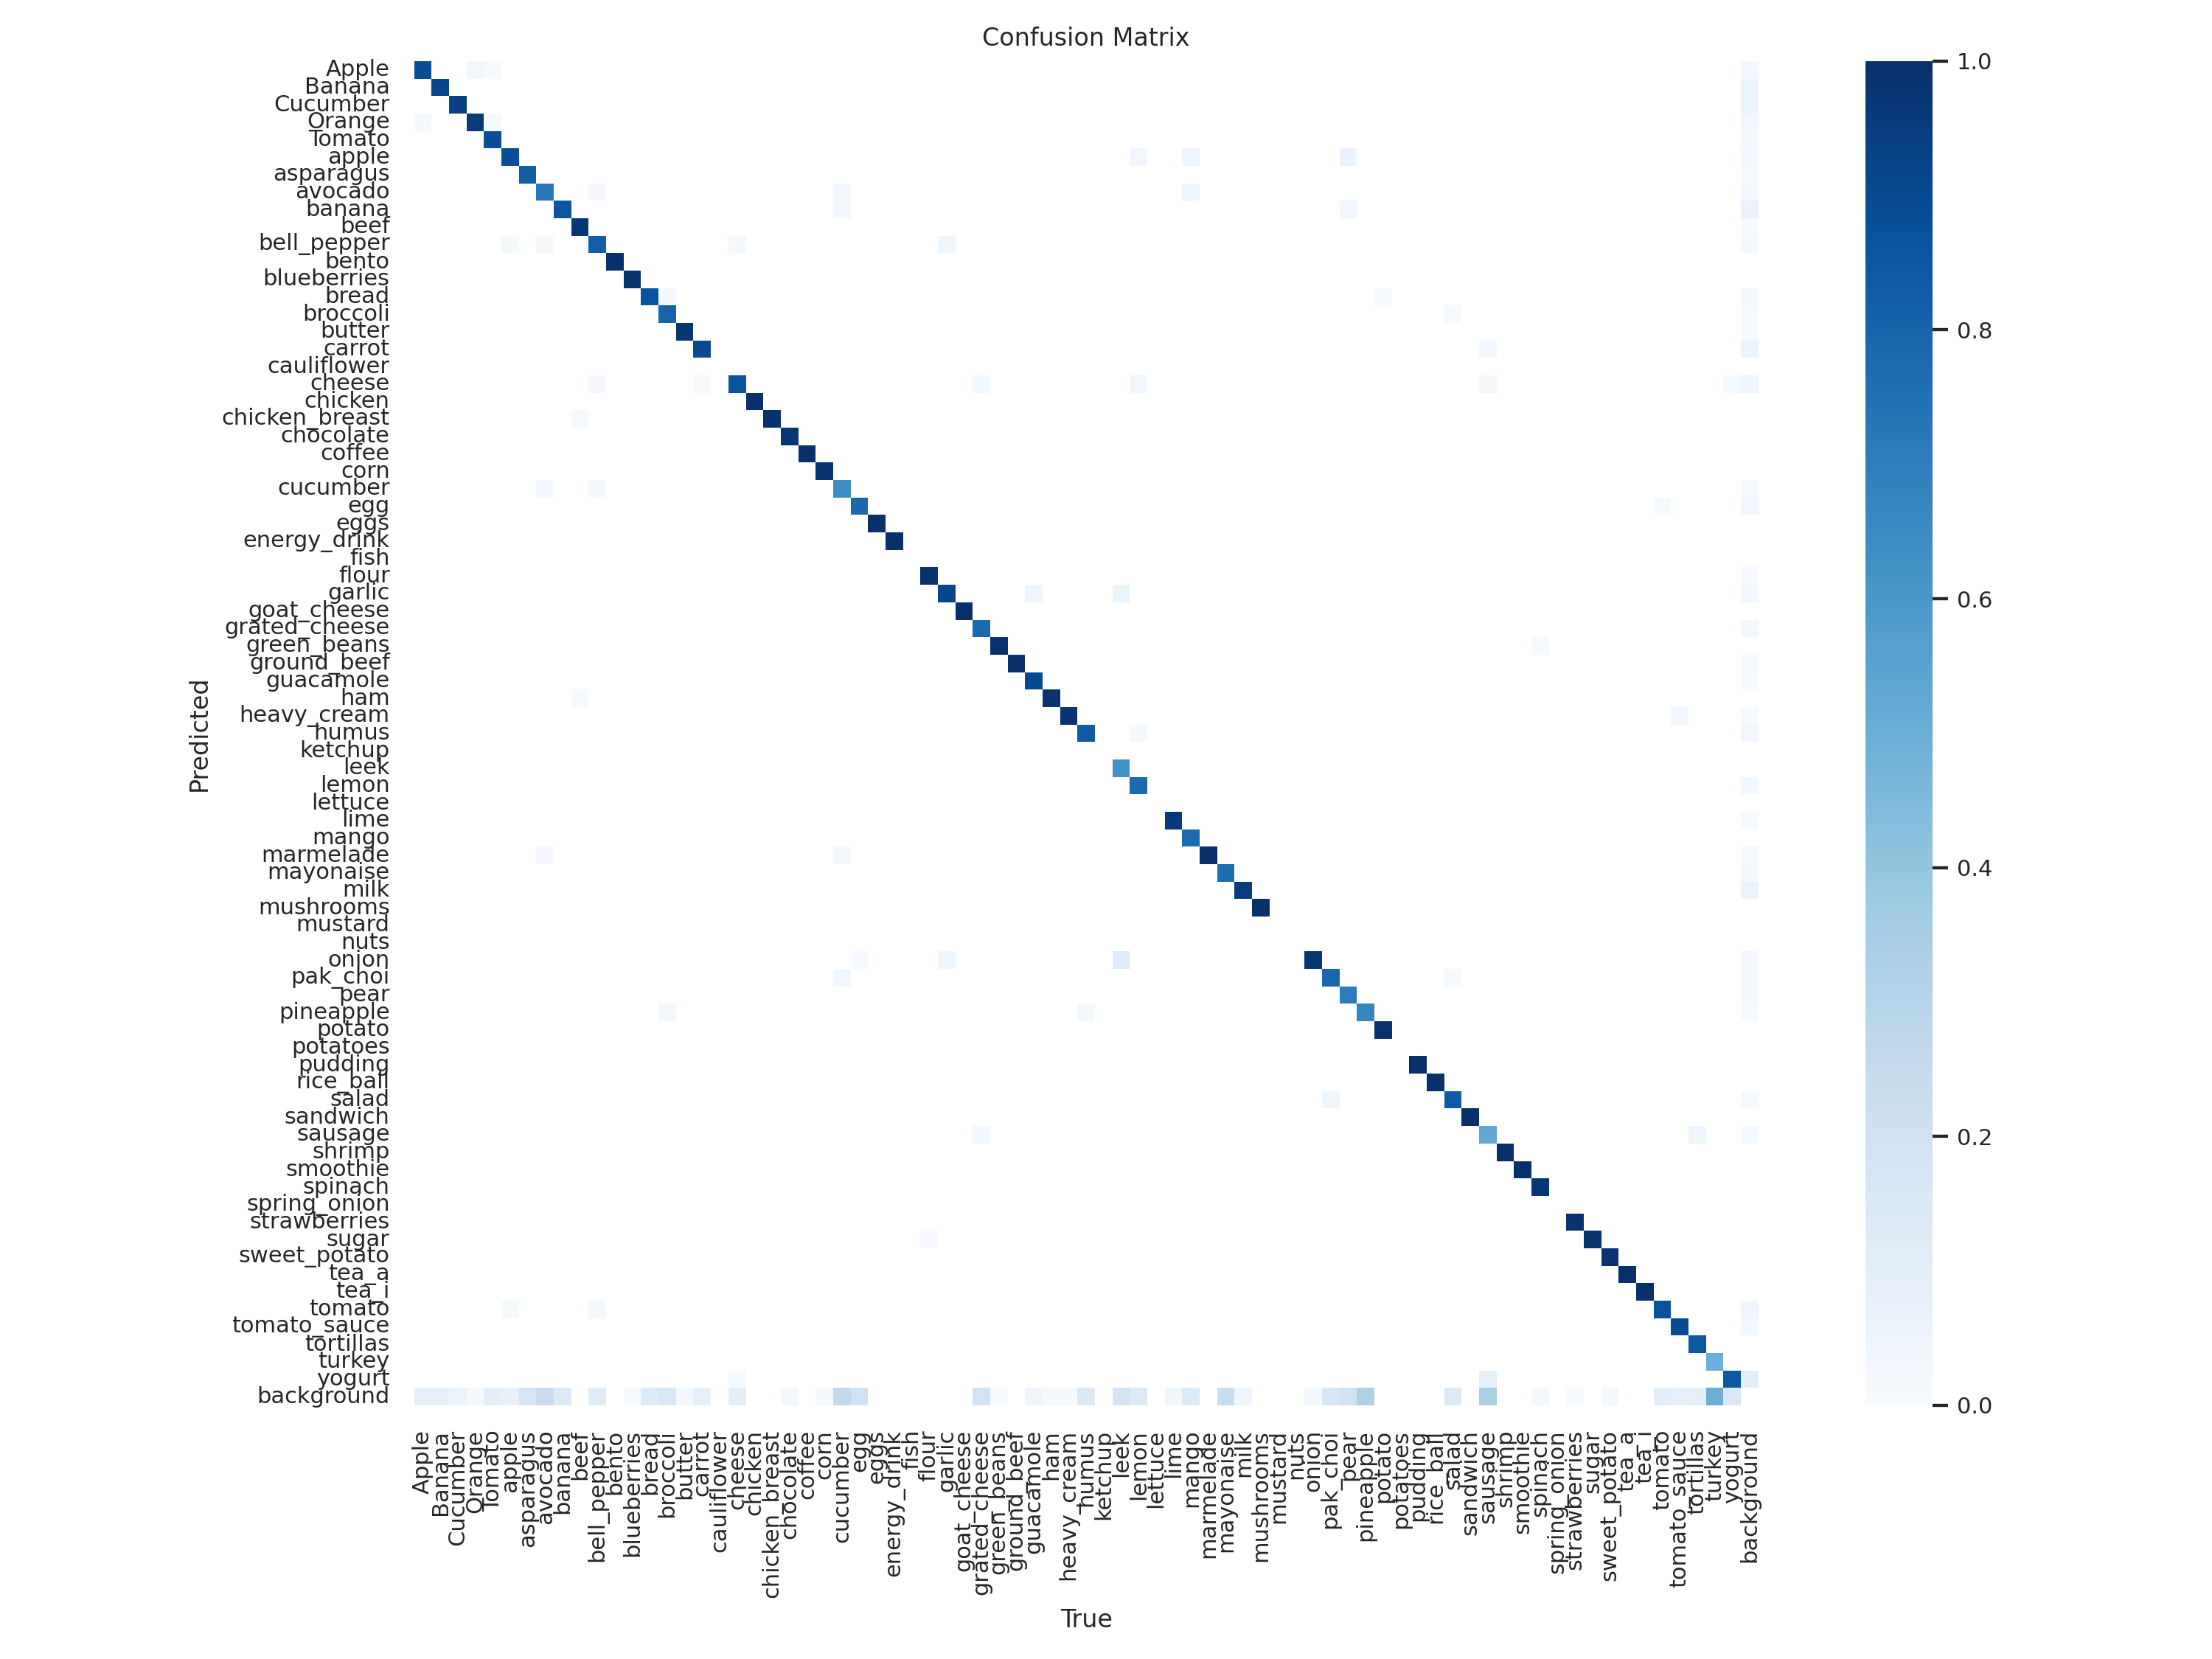

In [ ]:
%cd {HOME}
Image(filename="./runs/detect/train3/confusion_matrix.png", width=1200)

#### Results

The results image showcases the model's predictions on the validation set. It highlights the ground truth annotations, predicted bounding boxes, and the corresponding confidence scores. To view the results, we can display the image:

/content


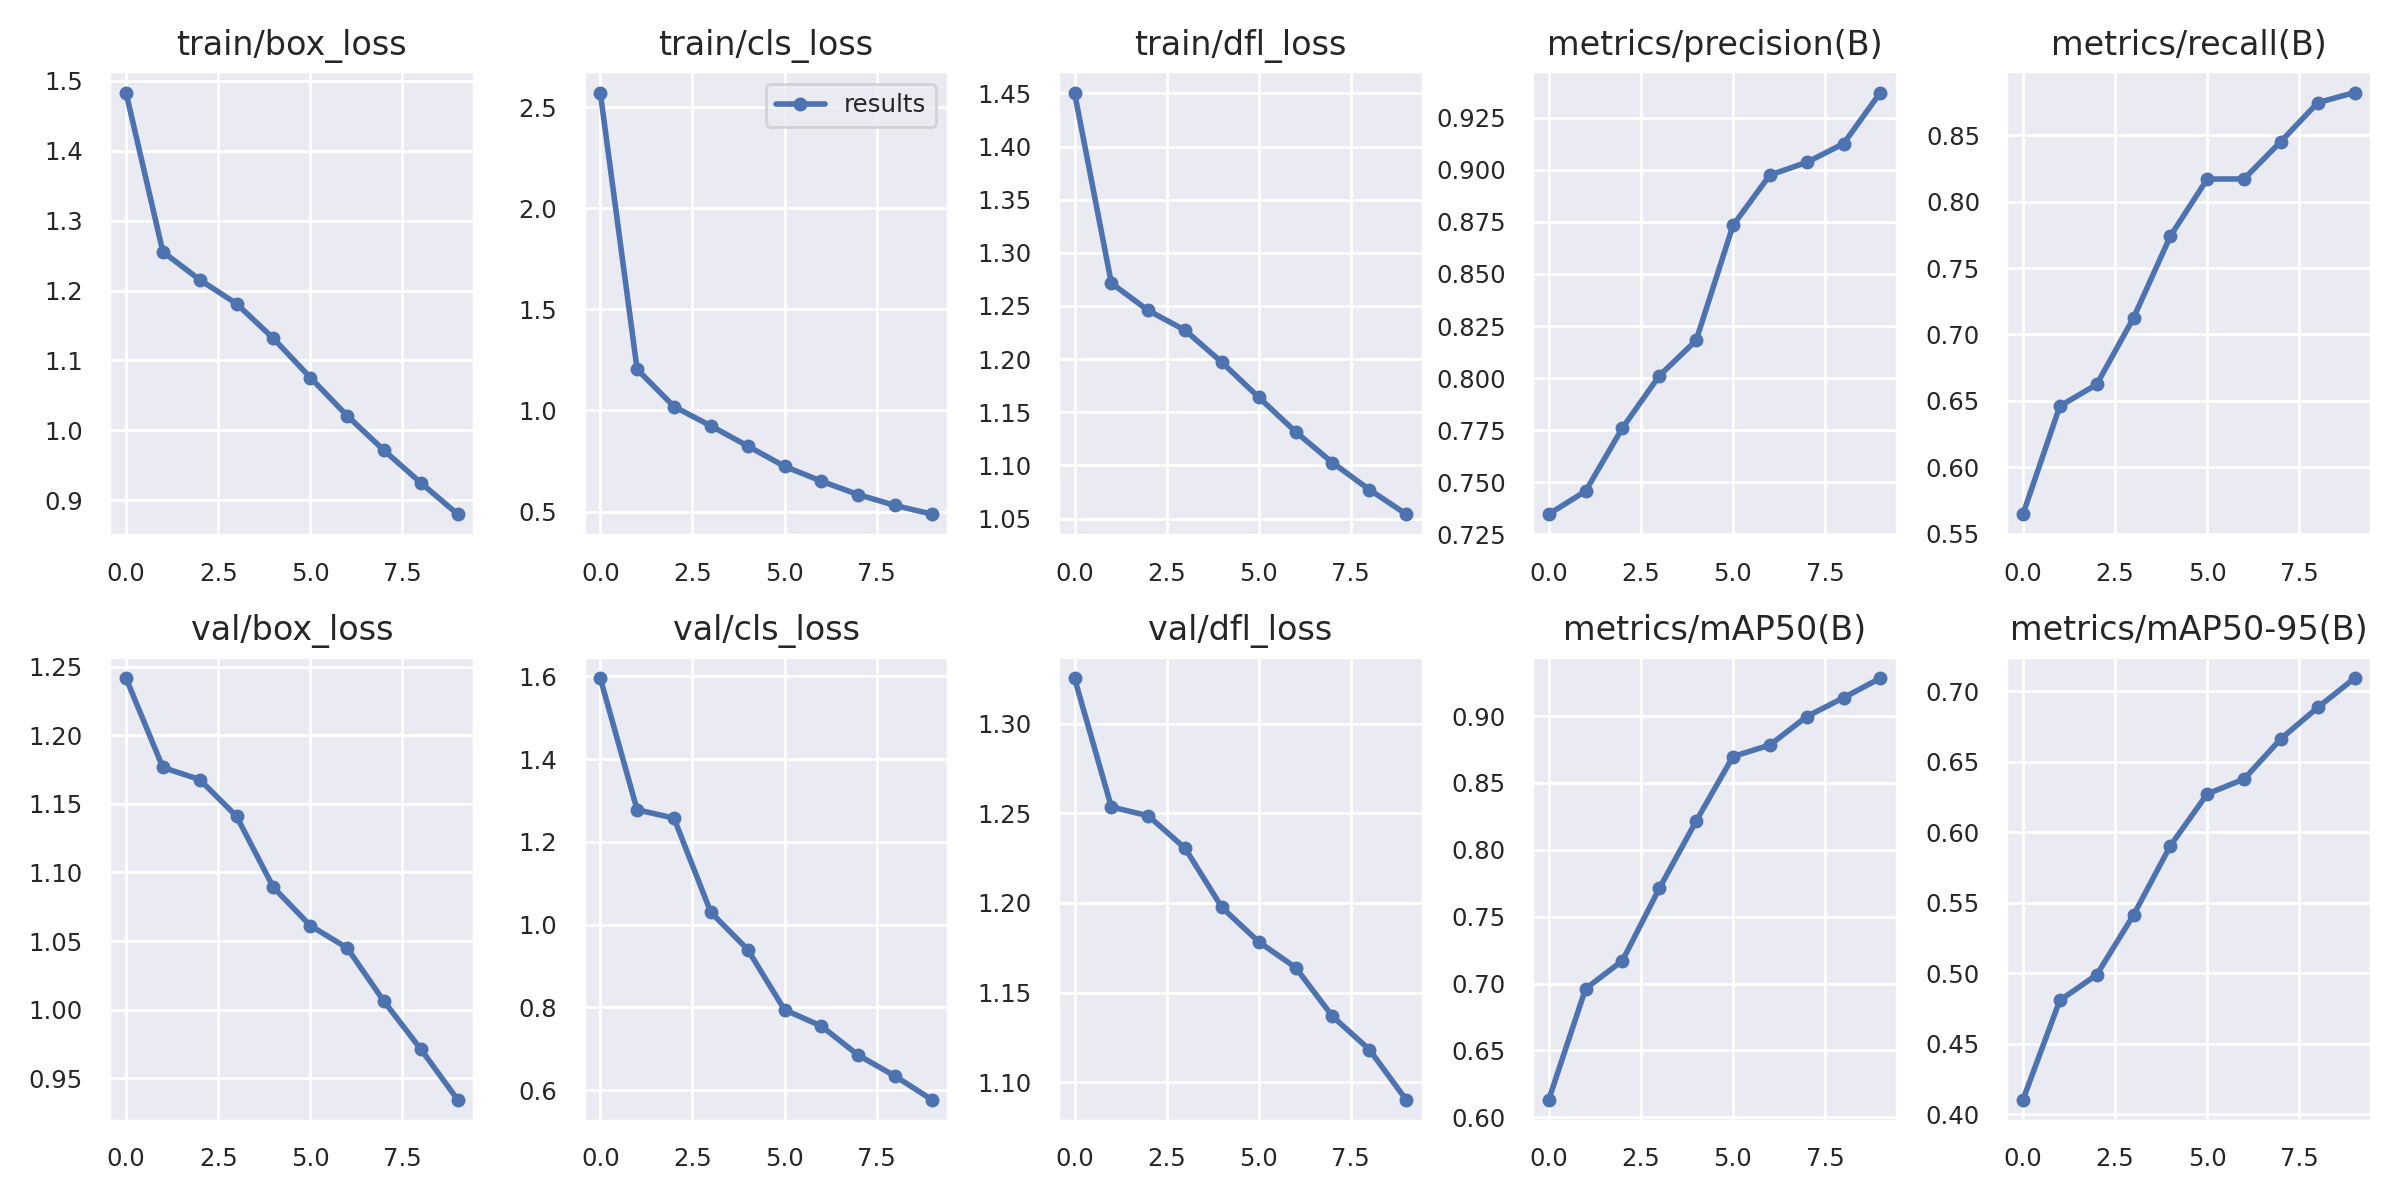

In [ ]:
%cd {HOME}
Image(filename="/content/runs/detect/train3/results.png", width=1000)

#### Example Prediction

Lastly, we can view an example prediction on a specific image from the validation set. This image shows the original image with the ground truth bounding boxes (green) and the predicted bounding boxes (red). It provides an indication of how well the model performs on individual images:

/content


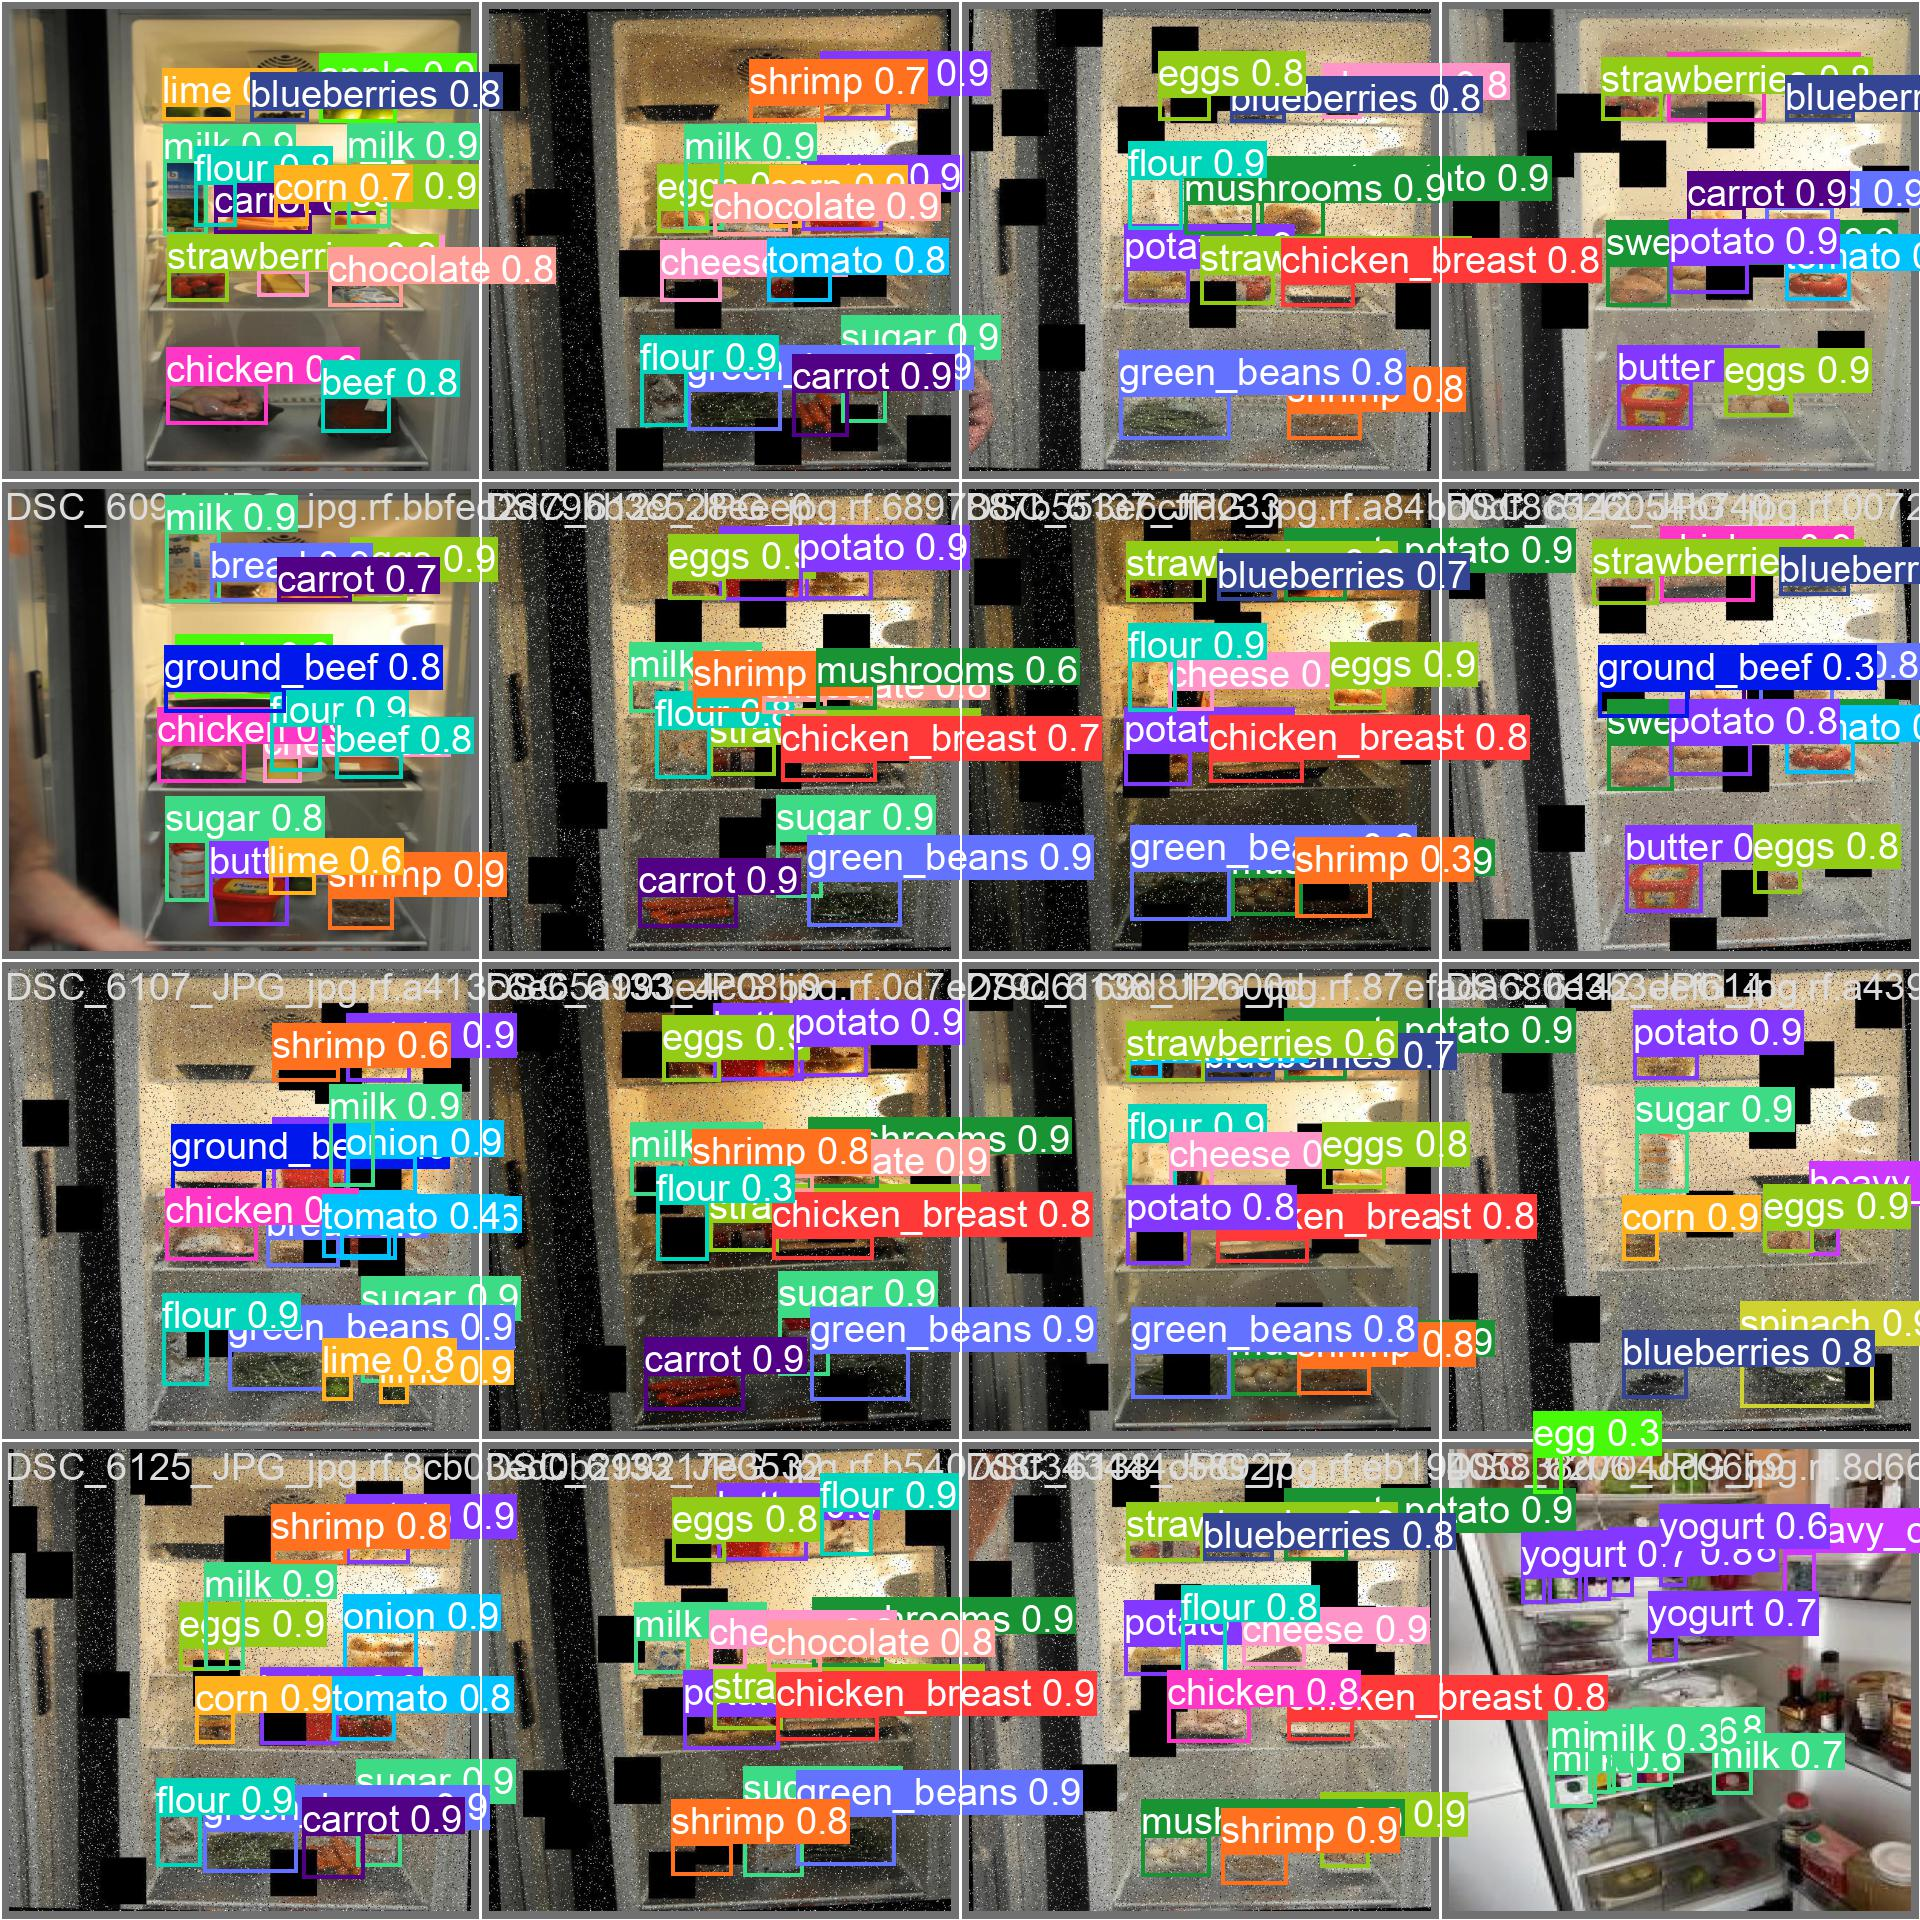

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/train3/val_batch1_pred.jpg', width=1200)

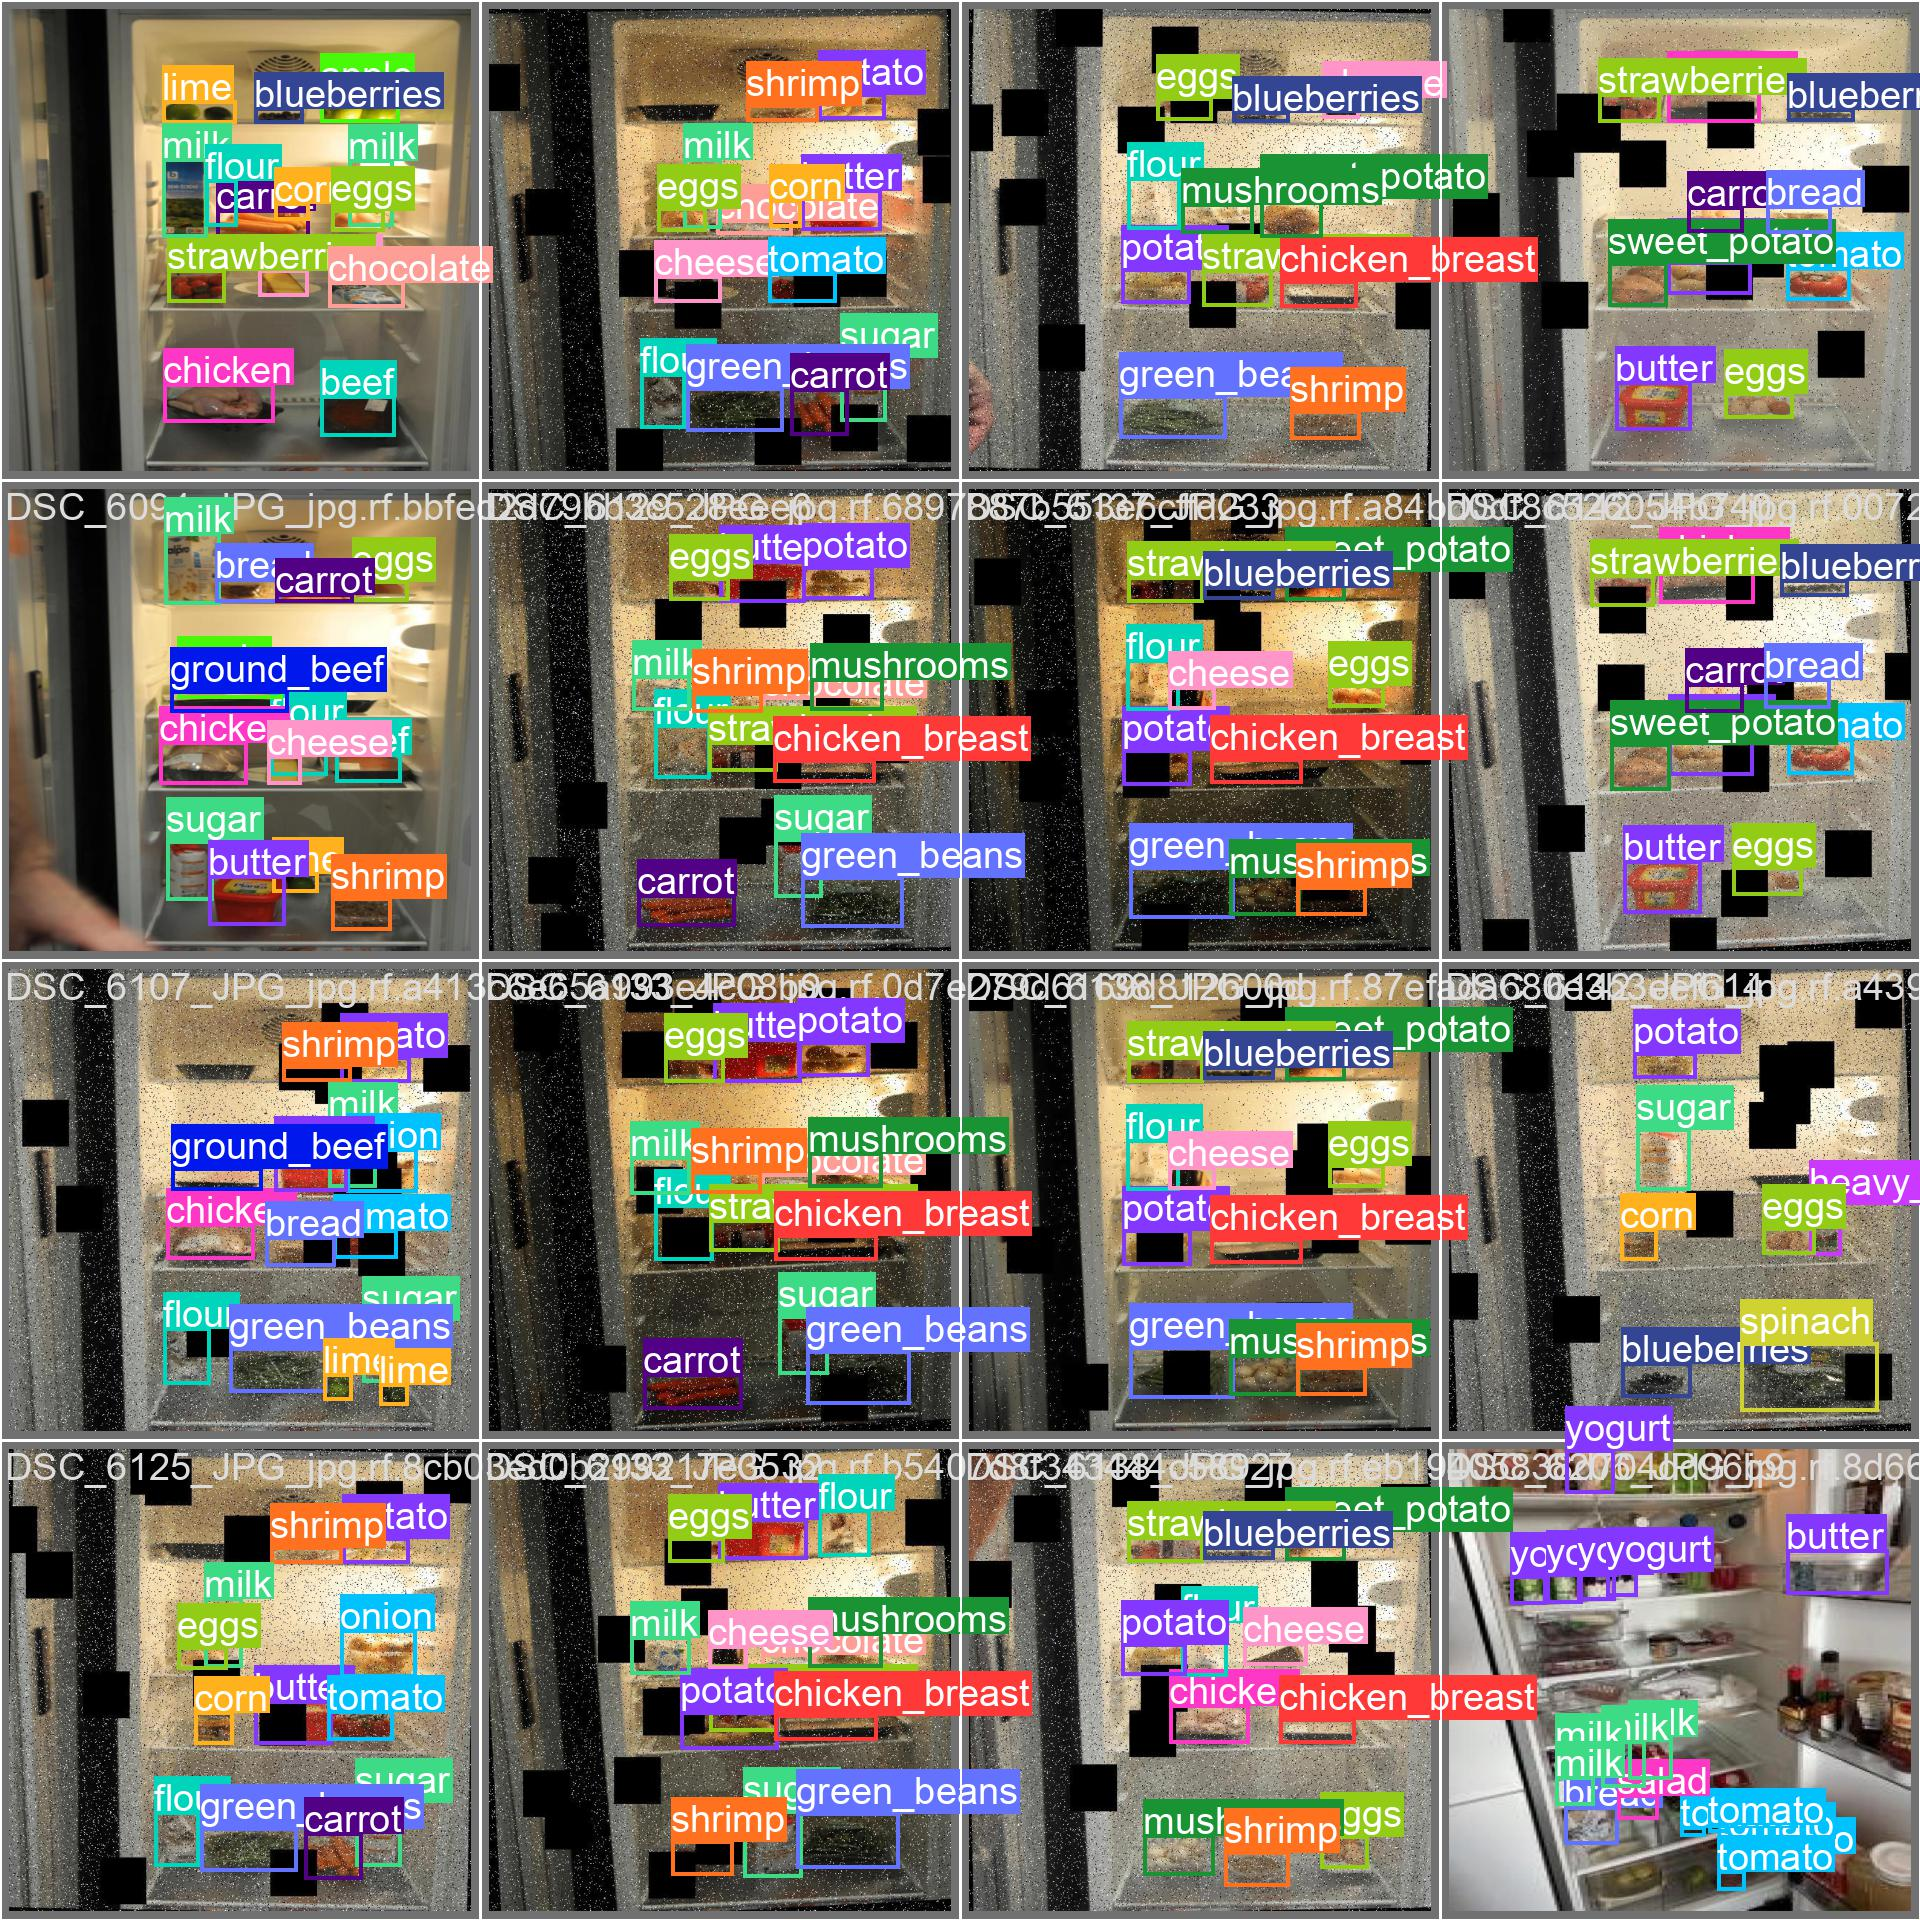

In [ ]:
Image(filename='/content/runs/detect/train3/val_batch1_labels.jpg', width=1200)

## Validate Custom Model

Now we run validation on the best model result from above.

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model="/content/runs/detect/train3/weights/best.pt" data={dataset.location}/data.yaml

/content
2023-07-03 19:46:00.784696: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 19:46:00.836082: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 19:46:01.709195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11154996 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/datasets/group_work-1/valid/labels.ca

The mean Average Precision or mAP score is calculated by taking the mean AP over all classes and/or overall IoU thresholds, depending on different detection challenges that exist.

The Mean Average Precision at IoU 50% shows values above 0.8 for most classes except for three: pineapple, pear and leek.Turkey had the lowest Map50 with 0.68. However with only 6 Instances the prediction cannot be harshly judged.

The Mean Averap Precision at IoU 95% however drops significantly. Never the less we did not consider the overlap between bounding boxes the most important feature of our model. in this case it is simply important to get the class prediction correct.

## Inference with Custom Model

In [ ]:
%cd {HOME}

# infer on a local image
predictions = model.predict("/content/datasets/group_work-1/test/images/006_png_jpg.rf.c306e418c63b2eede01fb1bd000e9f58.jpg", confidence=40, overlap=30).json()

print(predictions)

# Ground truth labels
ground_truth = ['bento', 'coffee', 'tea_i', 'sandwich', 'tea_a']

# Predicted labels
predicted_labels = [prediction['class'] for prediction in predictions['predictions']]

# Compute confusion matrix
cm = confusion_matrix(ground_truth, predicted_labels, labels=ground_truth)

# Print the confusion matrix
print(cm)

# visualize the prediction
for i, image_path in enumerate(glob.glob(f'{HOME}/datasets/group_work-1/valid/images/*.jpg')[100:105]):
  model.predict(image_path, confidence=40, overlap=30).save(f"prediction_{i}.jpg")

The Models weights were uploaded to roboflow and then implemented in our applications back end. Whilst the model may be fine tuned and trained further for optimizing the class predictions and the precision of the bounding boxes this time consuming and computationally expensive process could not be undertaken for the scope of this project.

In [ ]:
for image_path in glob.glob(f'{HOME}/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred